# DTSA5509 Supervised Machine Learning Final Project #

Location of this project: https://github.com/NikoKuu/Niko-s-intro-to-ML-project

## Project Topic ##
A dataset about heart attack risk was somewhat arbitrary chosen for this project. *The objective of this project is to create a model that can predict, when given a set of inputs, whether a person is in a high risk category of experiencing a heart attack.* Having an accurate model for this data is literally a matter of life and death as certain interventions could be done for high-risk patients.  
We will be trying to model the data with multiple supervised machine learning algorithms covered in the course: 
1. 'Traditional' Logistic Regression, 
2. (Pruned) Decision Tree, 
3. Ensemble method AdaBoost and 
4. Support Vector Machine model. 

If a method has hyperparameters or other tuning paramameters, best effort is made to get the best result. Then, based on the calculated metrics, the best model is chosen. 
## Data ##
The data set was found on Kaggle. The full source of the data set:

*Rashik Rahman. (2021?). Heart Attack Analysis & Prediction Dataset, Version 2.*

*Retrieved 09/06/2024 from https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/version/2.*


The data set consists of the occurence of a heart attack and 13 associated risk factors. The plan is to train a model using the risk factors as labels and whether hear attack happened or not as a target. That makes this work a binary classifier model. The thirteen features fall in three categories: binary (3), categorical (5) and continuous (5). The raw data has 303 samples (rows). The data set was saved in csv format and Pandas Python package was able to read it without any problems. 

## Data Cleaning ##
In the code below, basic information about the dataset is printed out: Size of the dataset, data types of the variables. Also, a couple of first rows of the dataset is printed out to show how the dataset looks. 

Descriptive statistics show if there're unreasonable values (min and max values) that are probably invalid data entries. It also shows means and standard deviations.

Another check for invalid, not-a-number, values shows that the data set is clean. However, when looking for duplicate entries, one row was found to be a duplicate and thus removed.

Finally, we checked how evenly the output variable is distributed. The response/target variable is distributed evenly between had-not-heart-attack and had-heart-attack.

Later, in the EDA section, it was found that the Old Peak measurement ('oldpeak') had too many zero values to be valid and those values were imputed with mean value of the feature. Another option would have been to drop the feature. Otherwise, the data summaries below look fine. 

In [454]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

datafile = 'heart.csv'
df = pd.read_csv(datafile)

print('\n*** Dataframe info ***')
print(df.info())
print('\n*** Five first rows ***')
print(df.head(5))
#print(df.columns[0])
#print('\nDatatypes in the dataframe:')
#print(df.dtypes)
print('\n*** Descriptive statistics ***')
print(df.describe())

#for c in df.columns[0:]:
#    print(c, df[c].unique())

#df['age'] = pd.to_numeric(df['age'], errors='coerce')
print('\n*** Any NaN values ***') 
print(df.isna().any()) 

print('\n*** Any duplicate rows? If so, remove them. ***')
print('Duplicate rows found:')
print(df[df.duplicated(keep='last')])
before = len(df)
#print(df.loc[163:164])
df = df.drop_duplicates()
print('Number of rows before', before, 'and after', len(df), 'removing duplicates.')

print('\n*** Balance of the response variable ***')
print('Number of more chance of heart attack:', sum(df.output==1), '('+str(round(sum(df.output==1)/len(df)*100))+'%)')
print('Number of less chance of heart attack:', sum(df.output==0), '('+str(round(sum(df.output==0)/len(df)*100))+'%)')

#print(pd.unique(df['slp']))


*** Dataframe info ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

*** Five first rows ***
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1

### Dataset info ###

The feature explanations (as stated on the Kaggle page) and datatypes are listed below:

0. Age: Age of the patient
    * Real-valued
1. Sex: Gender of the person
    * Binary-valued
2. cp: Chest Pain type
    * Categorical values
        * Value 1: typical angina
        * Value 2: atypical angina
        * Value 3: non-anginal pain
        * Value 4: asymptomatic
3. trtbps: resting blood pressure (in mm Hg)
    * Real-valued
4. chol: cholestoral in mg/dl fetched via BMI sensor
    * Real-valued
5. fbs: (fasting blood sugar > 120 mg/dl) 
    * Binary-valued
        * Value 1: true
        * Value 0: false
6. rest_ecg: resting electrocardiographic results
    * Categorical values
        * Value 0: normal
        * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
7. thalach: maximum heart rate achieved
    * Real-valued
8. exang: exercise induced angina
    * Binary-valued
        * Value 1: Yes
        * Value 0: No
9. oldpeak: Previous peak
    * Real-valued
10. slp: Slope
    * Categorical values: 0, 1, 2
11. ca: number of major vessels (0-3)
    * Real-valued integer
12. thall: Thal rate
    * Categorical values: 0, 1, 2, 3
13. target: 
    * Binary-valued
        * Value 0: less chance of heart attack 
        * Value 1: more chance of heart attack

## Exploratory Data Analysis ##

In EDA, we will change the data types of the binary and categorical features. Then, we check each the distribution and potential erroneous or missing values of each feature. Starting from the binary-valued to categorical and finally real-valued features. 

In the code below, we change the 'int64' data types to 'category' data types. This does not change the modeling process but makes it easier to identify what kind of data is in each feature. For convience, the original dataframe is also preserved. 

In [455]:
df_cat = df.copy()
df_cat = df_cat.astype({'sex':'category', 'cp':'category', 'fbs':'category', 'restecg':'category', 'exng':'category', 'slp':'category', 'thall':'category', 'output':'category'})
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trtbps    302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalachh  302 non-null    int64   
 8   exng      302 non-null    category
 9   oldpeak   302 non-null    float64 
 10  slp       302 non-null    category
 11  caa       302 non-null    int64   
 12  thall     302 non-null    category
 13  output    302 non-null    category
dtypes: category(8), float64(1), int64(5)
memory usage: 20.0 KB


#### Binary features
The binary features plotted in the count plots below. All them are reasonable balanced. People with high fasting blood sugar (fbs=1) is on the lower side, 15%, but not extremely lopsided that it would need any further action. 

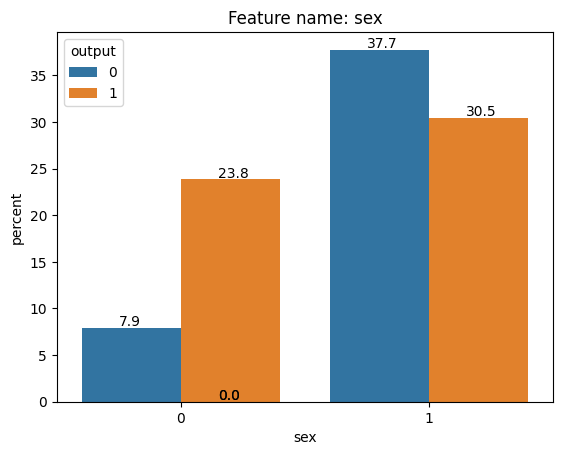

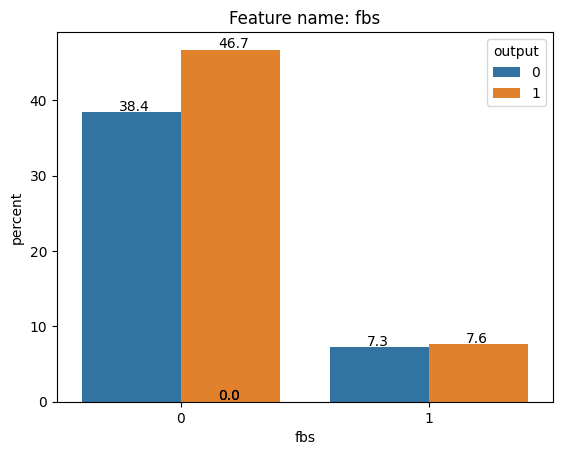

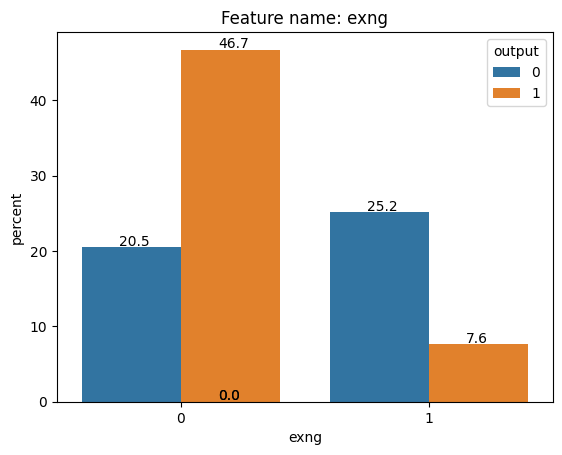

In [456]:
bin_features = ['sex', 'fbs', 'exng']

for ftr in bin_features:
    ax = sns.countplot(df_cat, x=ftr, stat="percent", hue='output')
    ### Source for next two lines: https://www.tutorialspoint.com/matplotlib-how-to-show-the-count-values-on-the-top-of-a-bar-in-a-countplot
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.2))
    ###
    plt.title('Feature name: '+ftr)
    plt.show()

#### Categorical features
The categorical features plotted in the count plots below. Resting ecg ('restecg') and thal rate ('thall') have some categories with pretty low count. If the model performance is not satisfactory, it could be a good idea to look balancing these features (e.g., with undersampling/oversmapling).

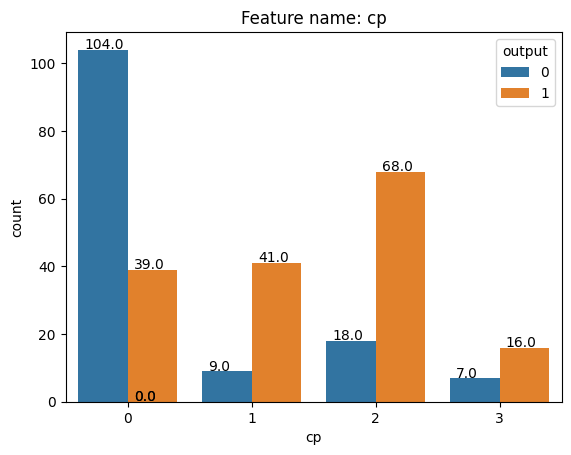

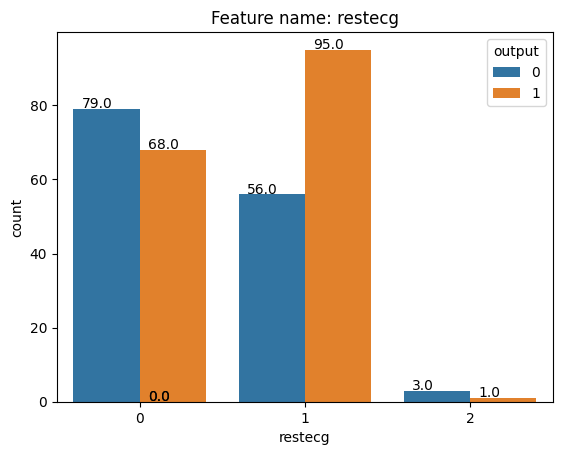

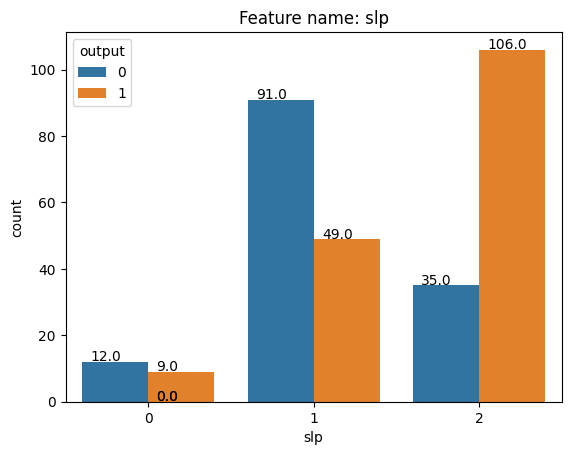

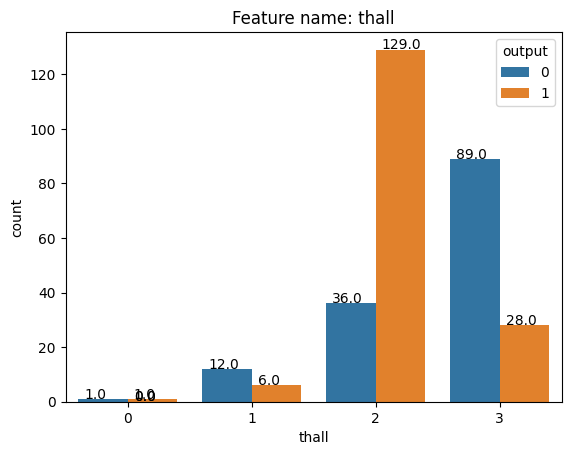

In [457]:
cat_features = ['cp', 'restecg', 'slp', 'thall']

for ftr in cat_features:
    ax = sns.countplot(df_cat, x=ftr, hue='output')
    ### Source for next two lines: https://www.tutorialspoint.com/matplotlib-how-to-show-the-count-values-on-the-top-of-a-bar-in-a-countplot
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.2))
    ###
    plt.title('Feature name: '+ftr)
    plt.show()

#### Real-valued features

Overall the distributions look good. 

However, the cholesterol feature, 'chol', has some fairly high values that do not fit otherwise gaussian looking distribution. We decided to remove those five rows.

Another issue is that the 'oldpeak' feature in the histogram above looks suspicious. A closer look reveals that it has a lot of zero values for a real-valued float-number feature. Perhaps there's no available data about the previous peak measurement and it was marked as zero. 

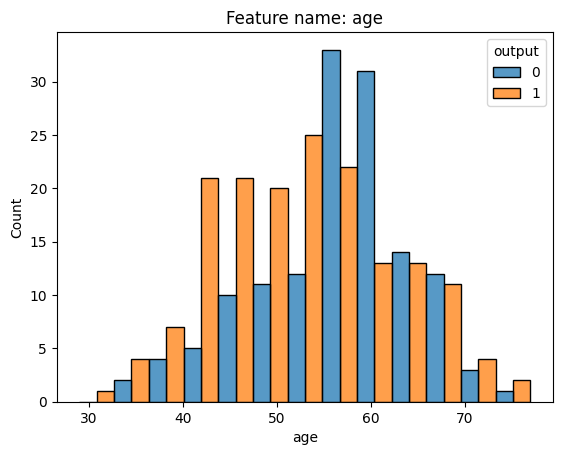

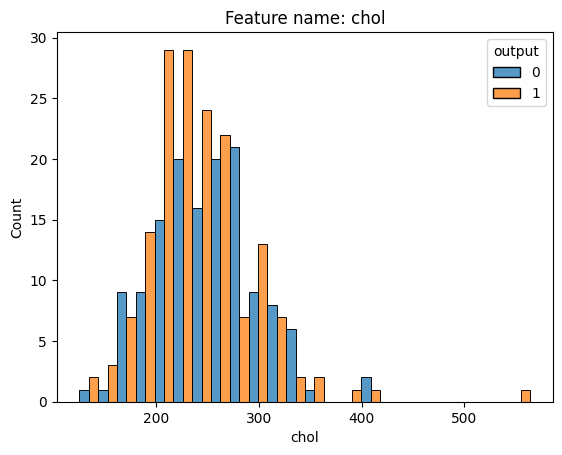

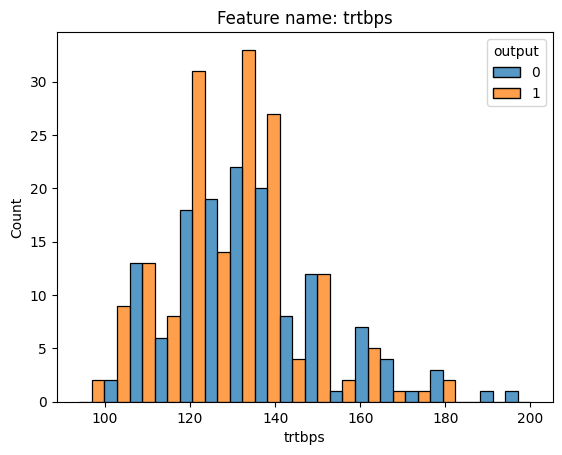

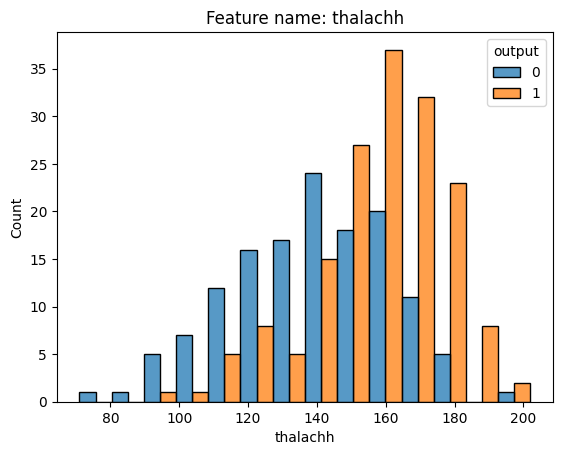

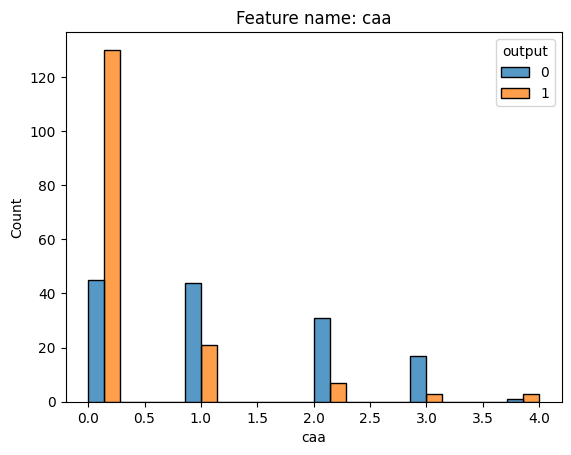

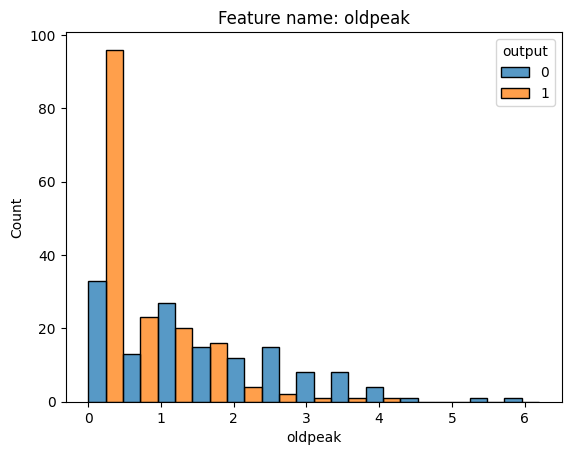

In [458]:
real_features = ['age', 'chol', 'trtbps', 'thalachh', 'caa', 'oldpeak']

for ftr in real_features:
    sns.histplot(data=df_cat, x=ftr, hue='output', multiple="dodge")
    plt.title('Feature name: '+ftr)
    plt.show()
  


Removing the rows where cholesterol measurement was an outlier.

Number of ouliers in cholesterol column: 5


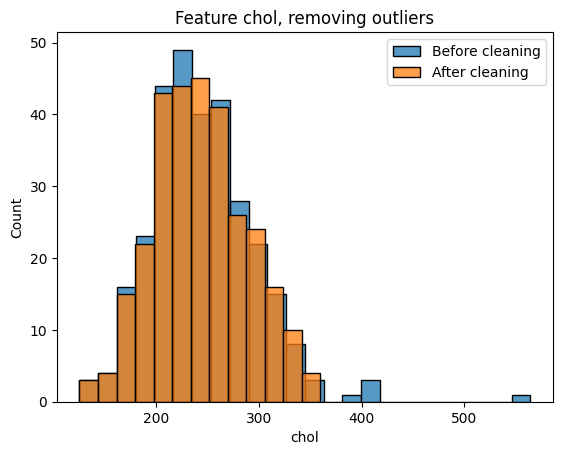

Before: Number of zero values in "oldpeak" column 98 out of 297


In [459]:
# Cholesterol cleaning
print('Number of ouliers in cholesterol column:', sum(df_cat['chol']>380))
sns.histplot(data=df_cat, x='chol')
df_cat = df_cat.loc[df_cat['chol']<380]
sns.histplot(data=df_cat, x='chol')
plt.title('Feature chol, removing outliers')
plt.legend(['Before cleaning', 'After cleaning'])
plt.show()

# Old peak cleaning
print('Before: Number of zero values in "oldpeak" column', sum(df_cat['oldpeak']==0), 'out of', len(df_cat['oldpeak']))


Old peak feature has a lot of zero values. One option is to drop the feature out from the model. Another option is to impute the missing values, which is done below by replacing the zero values with the group mean. 

Before: Number of zero values in "oldpeak" column 98 out of 297


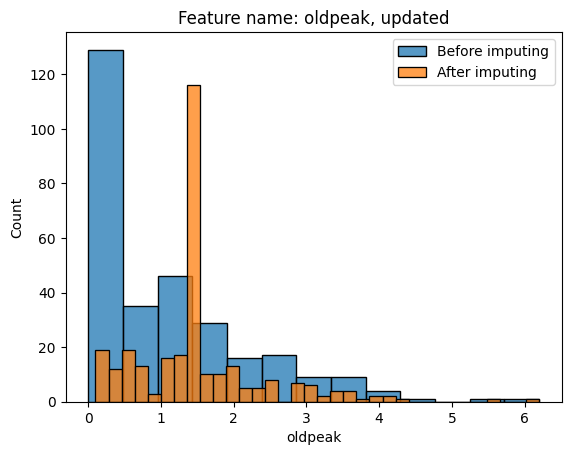

After: Number of zero values in "oldpeak" column 0 out of 297


In [460]:
print('Before: Number of zero values in "oldpeak" column', sum(df_cat['oldpeak']==0), 'out of', len(df_cat['oldpeak']))
sns.histplot(data=df_cat, x="oldpeak")
# Impute zero values with the mean
oldpeak_mean = np.mean(df_cat.loc[df_cat['oldpeak']!=0, 'oldpeak']) # Calculate mean of the rows that are not zero
df_cat.loc[df_cat['oldpeak']==0, 'oldpeak'] = oldpeak_mean # Replace the zeros with calculated mean
#print(oldpeak_mean, np.mean(df_cat['oldpeak']))
sns.histplot(data=df_cat, x="oldpeak")
plt.title('Feature name: '+ftr+', updated')
plt.legend(['Before imputing', 'After imputing'])
plt.show()
print('After: Number of zero values in "oldpeak" column', sum(df_cat['oldpeak']==0), 'out of', len(df_cat['oldpeak']))


Note that, in a real world case, the both these actions above should be checked with a domain expert who understands the methodology of measuring and intepreting this kind of data. 

Now that the data set is clean, we will check how the features correlate with each other.

Correlation analysis of the features plotted in the heatmap below shows no significant correlation between the features (darker red or green would mean correlation). 

Also the pairplot of the real-valued features does not show significant correlation as the values form roughly round shaped clouds.


In [474]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    float64 
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trtbps    297 non-null    float64 
 4   chol      297 non-null    float64 
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalachh  297 non-null    float64 
 8   exng      297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slp       297 non-null    category
 11  caa       297 non-null    int64   
 12  thall     297 non-null    category
 13  output    297 non-null    category
dtypes: category(8), float64(5), int64(1)
memory usage: 19.7 KB


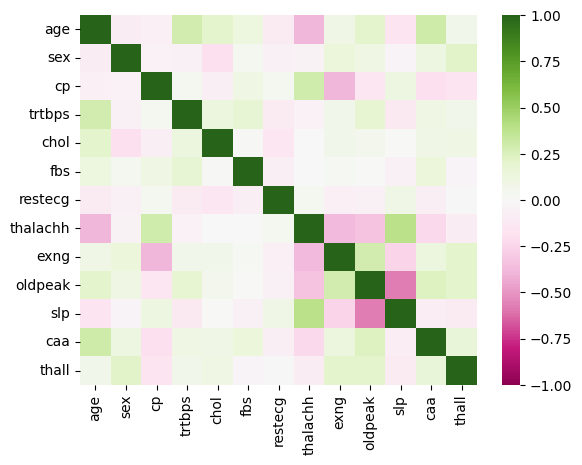

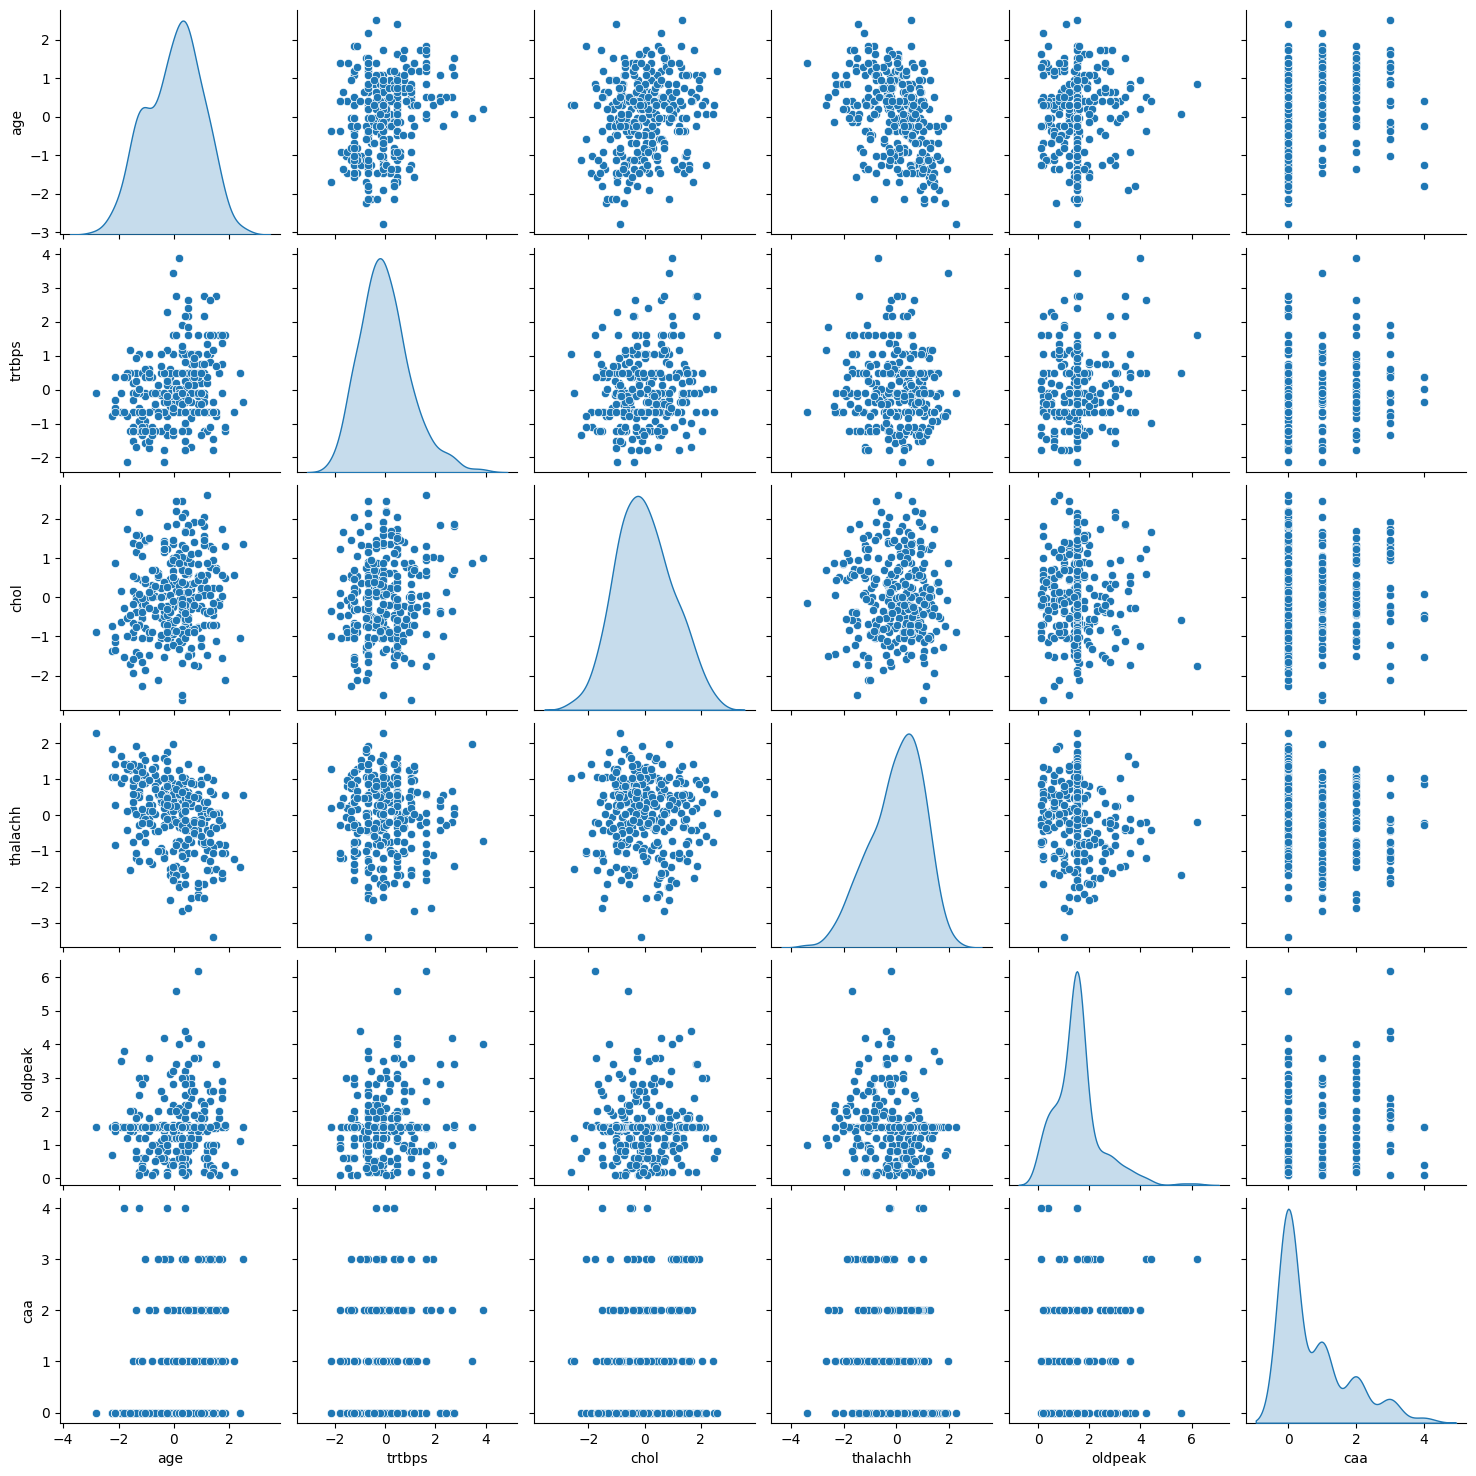

In [479]:
sns.heatmap(df.drop(columns='output').corr(),vmin=-1, vmax=1, cmap='PiYG')
plt.show()

sns.pairplot(df_cat, diag_kind='kde')
plt.show()


Now the data set has been checked for erronous values and cleaned. We have removed a duplicate data row, imputed the zero values in the 'oldpeak' feature and removed a few rows due to outliers in 'chol' feature values.  

### Prepare training and test sets ###

Here, we make a 80-20 split for training and test sets. 

Also, normalization is performed for the real-valued features: 'age', 'trtbps', 'chol' and 'thalachh'.

In [462]:
from sklearn.model_selection import train_test_split

test_split = 0.2 # 20/80 split test/train

# Normalize continuous variables
columns = ['age', 'trtbps', 'chol', 'thalachh']
for column in columns:
    df[column] = (df[column] - np.mean(df[column])) / np.std(df[column])
    df_cat[column] = (df_cat[column] - np.mean(df_cat[column])) / np.std(df_cat[column])
    
r_state = 6
if False:
    # Original dataframe. Not used.
    df_train, df_test = train_test_split(df, test_size=test_split, random_state=r_state)
elif False:
    # Drop "oldpeak"-feature. Not used.
    df_cat_no_old = df_cat.drop(columns='oldpeak', inplace=False)
    df_train, df_test = train_test_split(df_cat_no_old, test_size=test_split, random_state=r_state)
else:
    # Dataframe with categorical datatypes and normalized continuous variable. 
    df_train, df_test = train_test_split(df_cat, test_size=test_split, random_state=r_state)

print('The length of training set:', len(df_train), '\nThe length of testing set:', len(df_test))
y_train = df_train['output']
X_train = df_train.drop(columns='output', inplace=False)
y_test = df_test['output']
X_test = df_test.drop(columns='output', inplace=False)


The length of training set: 237 
The length of testing set: 60


## Models ##
As mentioned in the intro, four binary classification models are considered, 
1. 'Traditional' Logistic Regression, 
2. (Pruned) Decision Tree, 
3. Ensemble method AdaBoost and 
4. Support Vector Machine model. 
All of these can handle our binary classification output data.   

### Helper functions ###
The code below is used for calculating metrics for the models. The metrics extracted are listed below, the most important ones in **bold**::
* **False Negative Rate**
* **Accuracy**
* F1-score
* Precision
* **Recall**
* Area Under the Receiver Operating Characteristic Curve (ROC AUC)
* **Confusion matrix**

In [463]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay, roc_auc_score

class calc_metrics:
    def __init__(self, y_test, y_pred):
        self.confusion_matrix = None
        self.recall = None
        self.f1_score = None
        self.precision = None
        self.recall = None
        self.FNR = None

        self.get_metrics(y_test, y_pred)

    def get_metrics(self, y_test, y_pred):
        conf_mat = confusion_matrix(y_test, y_pred, labels=[0,1])
        self.confusion_matrix = pd.DataFrame(conf_mat)
        self.accuracy = accuracy_score(y_test, y_pred)
        self.f1_score = f1_score(y_test, y_pred)
        self.precision = precision_score(y_test, y_pred)
        self.recall = recall_score(y_test, y_pred)
        self.ROC_AUC = roc_auc_score(y_test, y_pred)
        FN = conf_mat[1][0]
        P = np.sum(conf_mat[1])
        self.FNR = FN/P
        print('False Negative Rate:', round(self.FNR,3))
        print('Accuracy:', round(self.accuracy, 3))
        print('F1-score:', round(self.f1_score,3))
        print('Precision:', round(self.precision,3))
        print('Recall:', round(self.recall,3))
        print('Area Under the Receiver Operating Characteristic Curve (ROC AUC):', round(self.ROC_AUC,3))
        print('Confusion matrix:')
        disp = ConfusionMatrixDisplay(conf_mat)
        disp.plot()
        plt.show()

### 1. Logistic regression model ###

Logistic regression model created below. Penalty function is L2 and solver is lbfgs. L1 penalty, and liblinear solver were also tried but they yielded slighlty worse results and thus are not shown here. 

The quality of a logistic regression model suffers when there is interaction between the features. As noted before there were no significant interaction in this data set. If there were, some of the features should be dropped out or dimension reduction tools shoud be used. 

The performance is evaluated with the test set by predicting the outcome and calculating the metrics.

Best parameters: {'C': np.float64(0.03125)}
Validation accuracy: 0.8187943262411348
False Negative Rate: 0.069
Accuracy: 0.85
F1-score: 0.857
Precision: 0.794
Recall: 0.931
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.853
Confusion matrix:


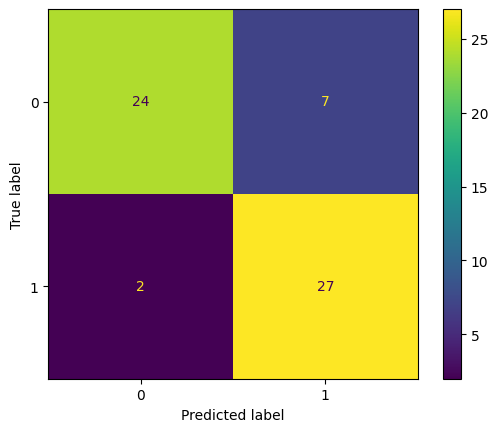

     Feature Coefficient
11       caa    -0.36059
12     thall    -0.32731
1        sex    -0.27261
8       exng    -0.26557
9    oldpeak    -0.25518
4       chol    -0.19611
0        age      -0.113
3     trtbps    -0.08792
5        fbs    -0.03383
6    restecg     0.11064
10       slp      0.3024
7   thalachh     0.38607
2         cp     0.41604


In [464]:
from sklearn.linear_model import LogisticRegression
LogReg_grid_paras = {'C':np.logspace(-5, 5, num=11 , base=2)}
myLogReg = LogisticRegression(penalty='l2', class_weight='balanced', C=0.1, solver='lbfgs', fit_intercept=True)
myLogReg_grid = GridSearchCV(estimator=myLogReg, param_grid=LogReg_grid_paras, scoring=None, n_jobs=None, refit=True, cv=5, verbose=0, pre_dispatch='2*n_jobs', return_train_score=True)
myLogReg_grid.fit(X_train, y_train) # Create the model
print('Best parameters:', myLogReg_grid.best_params_)
print('Validation accuracy:', myLogReg_grid.best_score_)

y_hat_LogReg = myLogReg_grid.best_estimator_.predict(X_test) # Make prediction
LogReg_metrics = calc_metrics(y_test, y_hat_LogReg) # calculate metrics
df_logreg = pd.DataFrame([X_train.columns, np.round(myLogReg_grid.best_estimator_.coef_,5)[0]], index=['Feature', 'Coefficient'])
print(df_logreg.sort_values('Coefficient', axis=1).transpose())

None of the model's coefficients are particurarly small. That indicates that most of them make a least some contribution to the model. The fasting blood sugar feature ('fbs') is only -0.033 making it the least important feature (i.e., closest to zero). 
Chest pain type ('cp'), maximum heart rate ('thalachh') and number of major vessels ('caa') are strongest predictors.

## 2. Decision Tree ##
Decision tree hyperparameters in the grid search for the best model are:
* Max depth, sweep values from 1 to 9.
* CCP alpha, sweep values from 0 to 8.
* Minimum number of samples per leaf, sweep values from 1 to 8.

Total number of models to consider is $9\times9\times8=648$, from which the model with best accuracy is selected using cross-validation.

Performance is evaluated with the test set by predicting the outcome and calculating the metrics.

Best parameters: {'ccp_alpha': 0, 'max_depth': 4, 'min_samples_leaf': 8}
Validation accuracy: 0.7806737588652483
False Negative Rate: 0.138
Accuracy: 0.833
F1-score: 0.833
Precision: 0.806
Recall: 0.862
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.834
Confusion matrix:


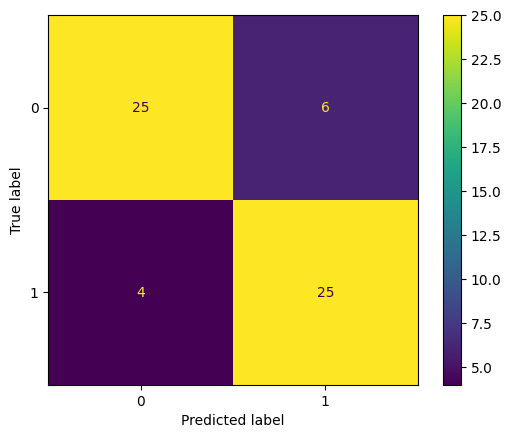

In [465]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
#from sklearn.ensemble import RandomForestClassifier

DT_grid_paras = {'max_depth':range(1,10), 'ccp_alpha':range(0, 9), 'min_samples_leaf':range(1,9)}
myDT_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=DT_grid_paras, scoring=None, n_jobs=None, refit=True, cv=5, verbose=0, pre_dispatch='2*n_jobs', return_train_score=True)
myDT_grid = myDT_grid.fit(X_train, y_train) # Create the model
print('Best parameters:', myDT_grid.best_params_)
print('Validation accuracy:', myDT_grid.best_score_)

myDT = myDT_grid.best_estimator_ # Save the best model
myDT.fit(X_train, y_train)
y_hat_DT = myDT.predict(X_test) # Estimate using the best model
DT_metrics = calc_metrics(y_test, y_hat_DT) # calculate metrics



In [466]:
df_DT = pd.DataFrame([X_train.columns, np.round(myDT.feature_importances_,5)], index=['Feature', 'Gini importance'])
print(df_DT.sort_values('Gini importance', axis=1).transpose())

     Feature Gini importance
1        sex             0.0
3     trtbps             0.0
5        fbs             0.0
7   thalachh         0.00918
6    restecg         0.01947
4       chol          0.0225
9    oldpeak         0.02405
10       slp         0.04036
8       exng         0.04922
0        age          0.1075
11       caa         0.13847
12     thall         0.15682
2         cp         0.43242


Similarly as with logistic regression Chest pain type ('cp') and number of major vessels ('caa') are strong predictors.
Resting blood pressure ('trtbps'), fasting blood sugar ('fbs') and resting ECG ('rest_ecg') do not contribute to this model. 

## 3. AdaBoost ##
Since AdaBoost algorithm was already coded from scratch as a part of the homework, AdaBoostClassifier from sklearn is used here. 

Number of estimators set to 200 after trying a few values.  

Performance is evaluated with the test set by predicting the outcome and calculating the metrics.

False Negative Rate: 0.069
Accuracy: 0.833
F1-score: 0.844
Precision: 0.771
Recall: 0.931
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.836
Confusion matrix:


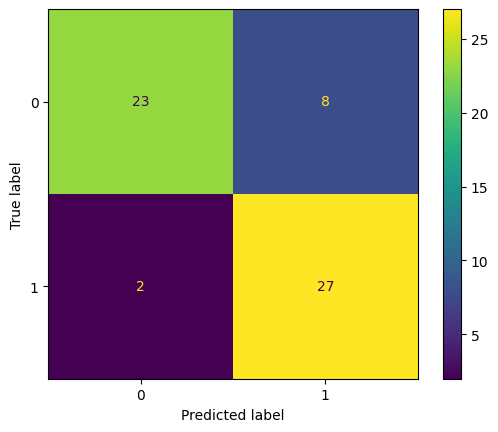

In [467]:
from sklearn.ensemble import AdaBoostClassifier

n = 200
myAdaBoost = AdaBoostClassifier(estimator=None, n_estimators=n, learning_rate=0.1, algorithm='SAMME', random_state=None)
myAdaBoost.fit(X_train, y_train) # Create the model

y_hat_AdaBoost = myAdaBoost.predict(X_test) # Estimate using the best model
AdaBoost_metrics = calc_metrics(y_test, y_hat_AdaBoost) # calculate metrics


In [468]:
df_Ada = pd.DataFrame([X_train.columns, np.round(myAdaBoost.feature_importances_,5)], index=['Feature', 'Gini importance'])
print(df_Ada.sort_values('Gini importance', axis=1).transpose())

     Feature Gini importance
5        fbs             0.0
6    restecg             0.0
0        age         0.01795
8       exng          0.0326
1        sex          0.0506
3     trtbps         0.05709
10       slp         0.07118
7   thalachh         0.10444
11       caa         0.12408
12     thall         0.12445
2         cp         0.12609
4       chol         0.13951
9    oldpeak         0.15202


Similarly as with logistic regression and Decision Tree, Chest pain type ('cp') and number of major vessels ('caa') rank high. However, previous peak ('oldpeak') amd cholesterol ('chol') are the strongest for AdaBoost.
Fasting blood sugar ('fbs') and resting ECG ('restecg') do not contribute to this model. 

## 4. SVM ##
Next is the Support Vector Machine -model. We will be trying with two kernels: 'rbf', the radial basis function and 'linear', linear hyperplane function. 

Performance is evaluated with the test set by predicting the outcome and calculating the metrics.

### Radial Basis Function
Hyperparameters C and gamma are swept using grid search when using the radial basis function. C and gamma are swept independently from $2^{-5}$ to $2^5$. 


Try Radial Basis Function kernel:
Best parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03125)}
Validation accuracy: 0.8315602836879433
False Negative Rate: 0.069
Accuracy: 0.833
F1-score: 0.844
Precision: 0.771
Recall: 0.931
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.836
Confusion matrix:


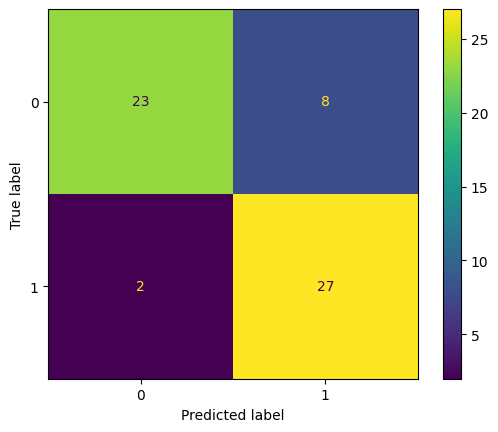

In [469]:
from sklearn.svm import SVC

print('\nTry Radial Basis Function kernel:')
SVC_grid_paras = {'C':np.logspace(-5, 5, num=11 , base=2), 'gamma':np.logspace(-5, 5, num=11 , base=2)}
my_SVC_grid = GridSearchCV(estimator=SVC(), param_grid=SVC_grid_paras, scoring=None, n_jobs=None, refit=True, cv=5, verbose=0, pre_dispatch='2*n_jobs', return_train_score=True)
my_SVC_grid = my_SVC_grid.fit(X_train, y_train) # Create the model
print('Best parameters:', my_SVC_grid.best_params_)
print('Validation accuracy:', my_SVC_grid.best_score_)
my_SVC = my_SVC_grid.best_estimator_ # Save the best model
y_hat_SVC = my_SVC.predict(X_test)
calc_metrics(y_test, y_hat_SVC) # calculate metrics

### Linear Function
Only hyperparameter C is swept from $2^{-5}$ to $2^5$ with linear kernel function (does not have gamma parameter). 

Best parameters: {'C': np.float64(0.0625)}
Validation accuracy: 0.8313829787234044
False Negative Rate: 0.069
Accuracy: 0.85
F1-score: 0.857
Precision: 0.794
Recall: 0.931
Area Under the Receiver Operating Characteristic Curve (ROC AUC): 0.853
Confusion matrix:


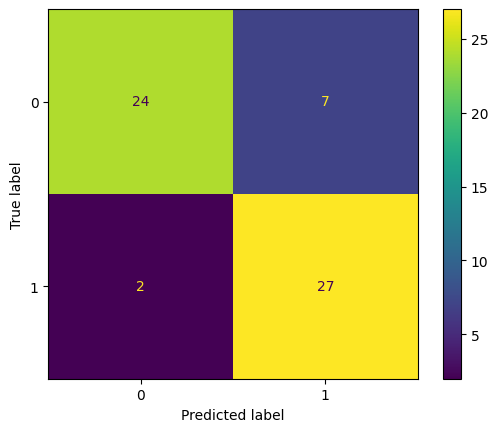

In [470]:
SVC_grid_paras = {'C':np.logspace(-5, 5, num=11 , base=2)}
my_linSVC_grid = GridSearchCV(estimator=SVC(kernel='linear'), param_grid=SVC_grid_paras, scoring=None, n_jobs=None, refit=True, cv=5, verbose=0, pre_dispatch='2*n_jobs', return_train_score=True)
my_linSVC_grid = my_linSVC_grid.fit(X_train, y_train) # Create the model
print('Best parameters:', my_linSVC_grid.best_params_)
print('Validation accuracy:', my_linSVC_grid.best_score_)
y_hat_linSVC = my_linSVC_grid.best_estimator_.predict(X_test) # Estimate using the best model
SVC_metrics = calc_metrics(y_test, y_hat_linSVC) # calculate metrics


In [471]:
df_SVC = pd.DataFrame([X_train.columns, np.round(my_linSVC_grid.best_estimator_.coef_[0],5)], index=['Feature', 'Coefficient'])
print(df_SVC.sort_values('Coefficient', axis=1).transpose())

     Feature Coefficient
12     thall    -0.51566
8       exng    -0.41879
11       caa    -0.40295
1        sex    -0.37836
4       chol    -0.24572
9    oldpeak    -0.22194
3     trtbps    -0.12261
5        fbs    -0.05791
0        age     -0.0084
6    restecg     0.06408
7   thalachh      0.3504
10       slp     0.45833
2         cp     0.48137


Linear kernel function is slightly better performing and is also simpler, thus we will choose it as the SVM-model. 

Since we ended up using the linear kernel, we can compare feature importance by looking at the absolute value of the coefficient. The higher the absolute value, the more important the feature. 

Similarly as with logistic regression, Decision Tree and AdaBoost, chest pain type ('cp') and number of major vessels ('caa') rank high. Thal rate ('thall') and slope ('slp') are also strong here.

Fasting blood sugar ('fbs'), age and resting ECG ('restecg') have the smallest effect in this model. 

## Results and Analysis ##

Here we compare the metrics of the four model side by side. Special attention should be paid to False Negative Rate and Recall.

Logistic Regression accuracy: 0.85
Decision Tree accuracy: 0.833
AdaBoost accuracy: 0.833
Support Vector Machine accuracy: 0.85

Logistic Regression recall: 0.931
Decision Tree recall: 0.862
AdaBoost recall: 0.931
Support Vector Machine recall: 0.931


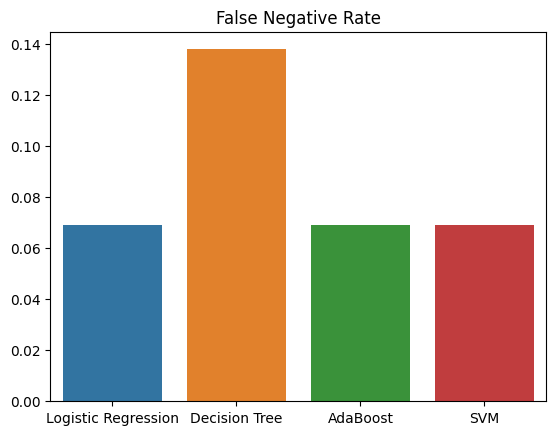

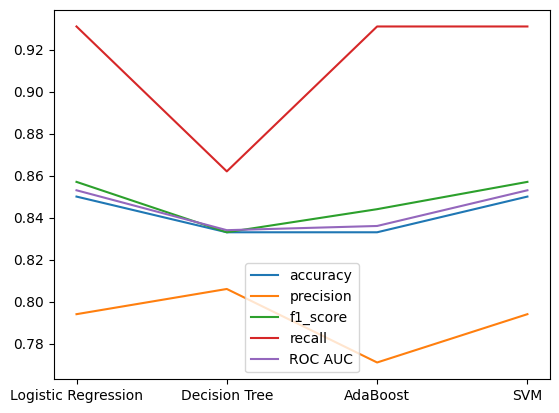

In [472]:
print('Logistic Regression accuracy:',round(LogReg_metrics.accuracy,3))
print('Decision Tree accuracy:',round(DT_metrics.accuracy,3))
print('AdaBoost accuracy:',round(AdaBoost_metrics.accuracy,3))
print('Support Vector Machine accuracy:',round(SVC_metrics.accuracy,3))
print()
print('Logistic Regression recall:',round(LogReg_metrics.recall,3))
print('Decision Tree recall:',round(DT_metrics.recall,3))
print('AdaBoost recall:',round(AdaBoost_metrics.recall,3))
print('Support Vector Machine recall:',round(SVC_metrics.recall,3))

#LogReg_metrics.accuracy
df_results = pd.DataFrame(np.round([[LogReg_metrics.accuracy, DT_metrics.accuracy, AdaBoost_metrics.accuracy, SVC_metrics.accuracy],
              [LogReg_metrics.precision, DT_metrics.precision, AdaBoost_metrics.precision, SVC_metrics.precision],
              [LogReg_metrics.f1_score, DT_metrics.f1_score, AdaBoost_metrics.f1_score, SVC_metrics.f1_score],
              [LogReg_metrics.recall, DT_metrics.recall, AdaBoost_metrics.recall, SVC_metrics.recall],
              [LogReg_metrics.ROC_AUC, DT_metrics.ROC_AUC, AdaBoost_metrics.ROC_AUC, SVC_metrics.ROC_AUC]],3), 
              index=['accuracy', 'precision', 'f1_score', 'recall', 'ROC AUC'], columns=['Logistic Regression', 'Decision Tree', 'AdaBoost', 'SVM'])

df_FNR = pd.DataFrame(np.round([[LogReg_metrics.FNR, DT_metrics.FNR, AdaBoost_metrics.FNR, SVC_metrics.FNR]], 3),
                      index = ['FNR'], columns=['Logistic Regression', 'Decision Tree', 'AdaBoost', 'SVM'])
#print(df_FNR)
sns.barplot(df_FNR)
plt.title('False Negative Rate')
plt.show()

plt.plot(df_results.transpose())
plt.legend(df_results.index)
plt.show()


Considering the type of the data where we want to predict heart conditions, we do not want to miss any potentially positive cases. That is why close attention should be paid to getting a low False Negative Rate (FNR) or, equivalently, high Recall score (1-FNR), and the bottom left corner of the confusion matrix.

Overall, the differences between the methods are relatively small and small changes in train-test split or random seed can change the models' ranking. The fact that logistic regression performs pretty well and SVM with linear kernel is at least as good as with non-linear kernel suggest that most of the features have close to linear relationship to the outcome. 

## Discussion and conclusion ##

Based on the metrics logistic regression and Support Vector Machine with linear kernel perform the best and AdaBoost is also strong. I would recommend using the logistic regression for this data because it has superior explainability.  

### Training time ###
Approximate training times are listed below. Decision tree has three-hyperparameter-grid and SVM with RBF has two, making them much slower. 
* Logistic Regression: <2s
* Decision Tree: 30s
* AdaBoost: <3s
* SVM:
    * RBF: 10s
    * Linear: 1s

The data set was relatively small so training time for all the algorithms was reasonable.

### Additional improvements
To further improve the models, one could look at balancing some of the more imbalanced features. Also based on the feature importance, some of the features could be dropped out. For example, fasting blood sugar was deemed not important by all four models. 

